In [ ]:
from google.colab import drive
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/My Drive/datasets/9tic-tac-toe_csv.csv')
df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,TL,TM,TR,ML,MM,MR,BL,BM,BR,class
0,x,x,x,x,o,o,x,o,o,True
1,x,x,x,x,o,o,o,x,o,True
2,x,x,x,x,o,o,o,o,x,True
3,x,x,x,x,o,o,o,b,b,True
4,x,x,x,x,o,o,b,o,b,True


In [ ]:
from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder()
columns = df.columns
df[columns] = df[columns].apply(LabelEncoder().fit_transform)
df.head

<bound method NDFrame.head of      TL  TM  TR  ML  MM  MR  BL  BM  BR  class
0     2   2   2   2   1   1   2   1   1      1
1     2   2   2   2   1   1   1   2   1      1
2     2   2   2   2   1   1   1   1   2      1
3     2   2   2   2   1   1   1   0   0      1
4     2   2   2   2   1   1   0   1   0      1
..   ..  ..  ..  ..  ..  ..  ..  ..  ..    ...
953   1   2   2   2   1   1   1   2   2      0
954   1   2   1   2   2   1   2   1   2      0
955   1   2   1   2   1   2   2   1   2      0
956   1   2   1   1   2   2   2   1   2      0
957   1   1   2   2   2   1   1   2   2      0

[958 rows x 10 columns]>

In [ ]:
# from sklearn.impute import SimpleImputer
# imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
# imp = imp.fit(df)
# df = imp.transform(df)
# df = pd.DataFrame(df, columns = columns)
# print(df)

In [ ]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1:]

In [ ]:
df_train, df_test = train_test_split(df, test_size=0.33, random_state=42)

In [ ]:
X_train = df_train.iloc[:, :-1]
X_test = df_test.iloc[:, :-1]
y_train = df_train.iloc[:, -1:]
y_test = df_test.iloc[:, -1:]

In [ ]:
treemodel = DecisionTreeClassifier()
treemodel.fit(X_train,y_train)


DecisionTreeClassifier()

[Text(0.48549107142857145, 0.9583333333333334, 'x[4] <= 1.5\ngini = 0.46\nsamples = 641\nvalue = [230, 411]'),
 Text(0.19706632653061223, 0.875, 'x[4] <= 0.5\ngini = 0.5\nsamples = 338\nvalue = [167, 171]'),
 Text(0.08163265306122448, 0.7916666666666666, 'x[8] <= 1.5\ngini = 0.423\nsamples = 115\nvalue = [35, 80]'),
 Text(0.030612244897959183, 0.7083333333333334, 'x[0] <= 1.5\ngini = 0.493\nsamples = 61\nvalue = [27, 34]'),
 Text(0.02040816326530612, 0.625, 'gini = 0.0\nsamples = 15\nvalue = [15, 0]'),
 Text(0.04081632653061224, 0.625, 'x[8] <= 0.5\ngini = 0.386\nsamples = 46\nvalue = [12, 34]'),
 Text(0.030612244897959183, 0.5416666666666666, 'gini = 0.0\nsamples = 14\nvalue = [0, 14]'),
 Text(0.05102040816326531, 0.5416666666666666, 'x[6] <= 1.5\ngini = 0.469\nsamples = 32\nvalue = [12, 20]'),
 Text(0.02040816326530612, 0.4583333333333333, 'x[2] <= 1.5\ngini = 0.48\nsamples = 15\nvalue = [9, 6]'),
 Text(0.01020408163265306, 0.375, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(0.0

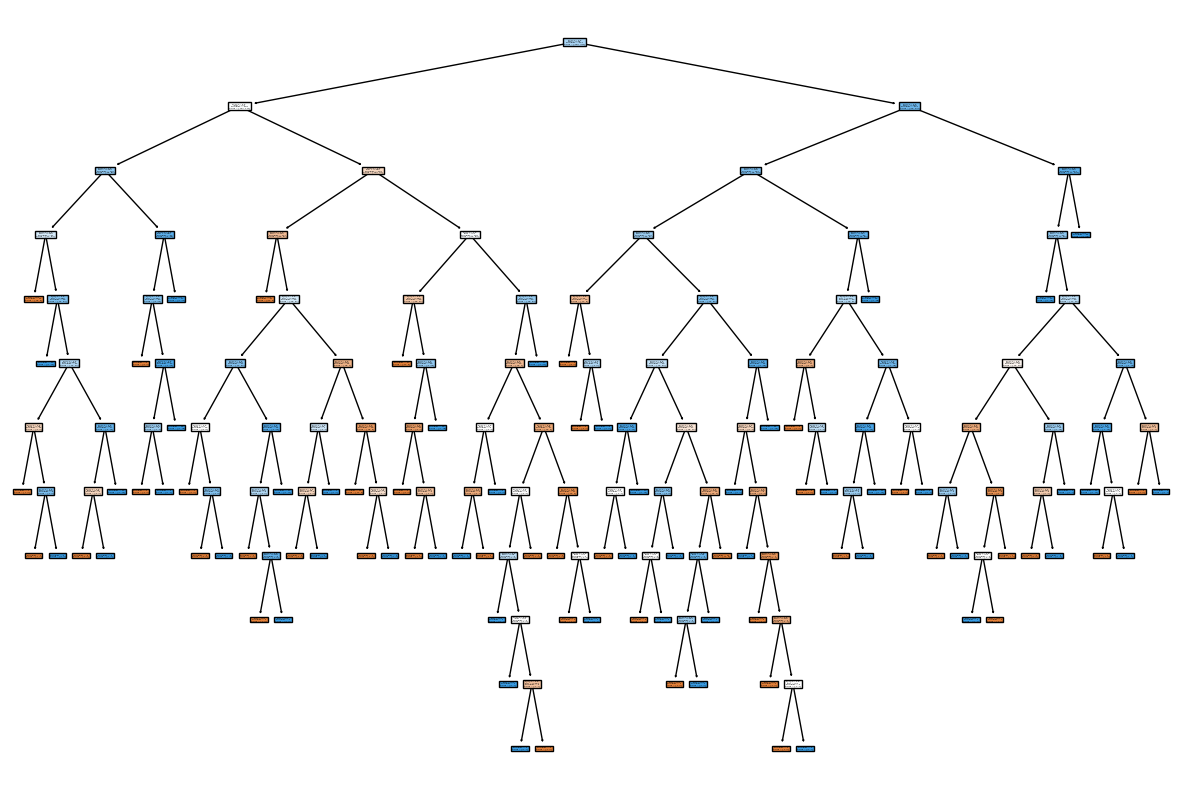

In [ ]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(treemodel,filled=True)

In [ ]:
y_pred=treemodel.predict(X_test)

In [ ]:
print(f'accuracy: {accuracy_score(y_pred,y_test):.6f}')

accuracy: 0.921136


# Default Deciciotn Tree Reports

In [ ]:
print(classification_report(y_pred,y_test))


              precision    recall  f1-score   support

           0       0.87      0.88      0.88       101
           1       0.94      0.94      0.94       216

    accuracy                           0.92       317
   macro avg       0.91      0.91      0.91       317
weighted avg       0.92      0.92      0.92       317



In [ ]:
treemodel_post_pruning = DecisionTreeClassifier(max_depth=8)
treemodel_post_pruning.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=8)

In [ ]:
treemodel_post_pruning.fit(X_train,y_train)


DecisionTreeClassifier(max_depth=8)

[Text(0.4867665816326531, 0.9444444444444444, 'x[4] <= 1.5\ngini = 0.46\nsamples = 641\nvalue = [230, 411]'),
 Text(0.1996173469387755, 0.8333333333333334, 'x[4] <= 0.5\ngini = 0.5\nsamples = 338\nvalue = [167, 171]'),
 Text(0.08163265306122448, 0.7222222222222222, 'x[8] <= 1.5\ngini = 0.423\nsamples = 115\nvalue = [35, 80]'),
 Text(0.030612244897959183, 0.6111111111111112, 'x[0] <= 1.5\ngini = 0.493\nsamples = 61\nvalue = [27, 34]'),
 Text(0.02040816326530612, 0.5, 'gini = 0.0\nsamples = 15\nvalue = [15, 0]'),
 Text(0.04081632653061224, 0.5, 'x[8] <= 0.5\ngini = 0.386\nsamples = 46\nvalue = [12, 34]'),
 Text(0.030612244897959183, 0.3888888888888889, 'gini = 0.0\nsamples = 14\nvalue = [0, 14]'),
 Text(0.05102040816326531, 0.3888888888888889, 'x[6] <= 1.5\ngini = 0.469\nsamples = 32\nvalue = [12, 20]'),
 Text(0.02040816326530612, 0.2777777777777778, 'x[2] <= 1.5\ngini = 0.48\nsamples = 15\nvalue = [9, 6]'),
 Text(0.01020408163265306, 0.16666666666666666, 'gini = 0.0\nsamples = 7\nvalue 

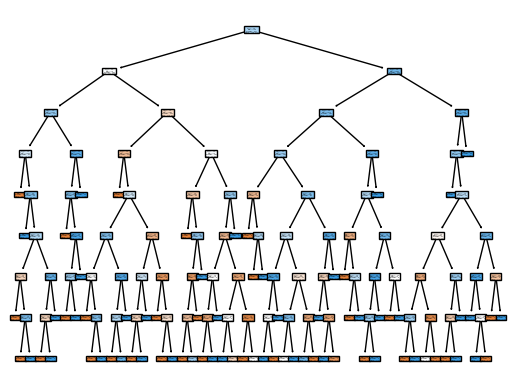

In [ ]:
tree.plot_tree(treemodel_post_pruning,filled=True)


In [ ]:
y_pred_post_pruning =treemodel_post_pruning.predict(X_test)


In [ ]:
print(f'accuracy: {accuracy_score(y_pred_post_pruning,y_test):.6f}')


accuracy: 0.930599


# Post Pruning Deciciotn Tree Reports

In [ ]:
print(classification_report(y_pred_post_pruning,y_test))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89        98
           1       0.96      0.94      0.95       219

    accuracy                           0.93       317
   macro avg       0.92      0.92      0.92       317
weighted avg       0.93      0.93      0.93       317



In [ ]:
## Preprunning
parameter={
 'criterion':['gini','entropy','log_loss'],
  'splitter':['best','random'],
  'max_depth':[1,2,3,4,5,6,7,8, 9, 10, 11, 12, 13, 15, 16],
  'max_features':['auto', 'sqrt', 'log2']

}

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
treemodel_pre_pruninig=DecisionTreeClassifier()
cv=GridSearchCV(treemodel_pre_pruninig,param_grid=parameter,cv=5,scoring='accuracy')


In [ ]:
cv.fit(X_train,y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 15, 16],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [ ]:
cv.best_params_

{'criterion': 'log_loss',
 'max_depth': 15,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [ ]:
y_pred_pre_pruning=cv.predict(X_test)


In [ ]:
print(f'accuracy: {accuracy_score(y_pred_pre_pruning,y_test):.6f}')

accuracy: 0.807571


# PrePruning Decision Tree Report

In [ ]:
print(classification_report(y_pred_pre_pruning,y_test))


              precision    recall  f1-score   support

           0       0.69      0.71      0.70        99
           1       0.87      0.85      0.86       218

    accuracy                           0.81       317
   macro avg       0.78      0.78      0.78       317
weighted avg       0.81      0.81      0.81       317



In [ ]:
treemodel_cost_complexity=DecisionTreeClassifier()
path = treemodel_cost_complexity.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities


In [ ]:
ccp_alphas

array([0.        , 0.00117005, 0.00124805, 0.0013372 , 0.00138672,
       0.00141824, 0.00143006, 0.00144006, 0.00145606, 0.00156006,
       0.00177896, 0.00200579, 0.00208008, 0.00208008, 0.00216675,
       0.00255283, 0.0026001 , 0.00264511, 0.00267439, 0.00280811,
       0.00281851, 0.00286011, 0.00340377, 0.00340377, 0.00345888,
       0.00374415, 0.00396439, 0.0043616 , 0.00464853, 0.00468019,
       0.00486807, 0.00509514, 0.00536271, 0.00562536, 0.00574859,
       0.00578023, 0.00603604, 0.00657851, 0.00777142, 0.00988704,
       0.01351552, 0.01426063, 0.01603131, 0.01734373, 0.01957837,
       0.04082229])

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))


Number of nodes in the last tree is: 1 with ccp_alpha: 0.040822287452333794


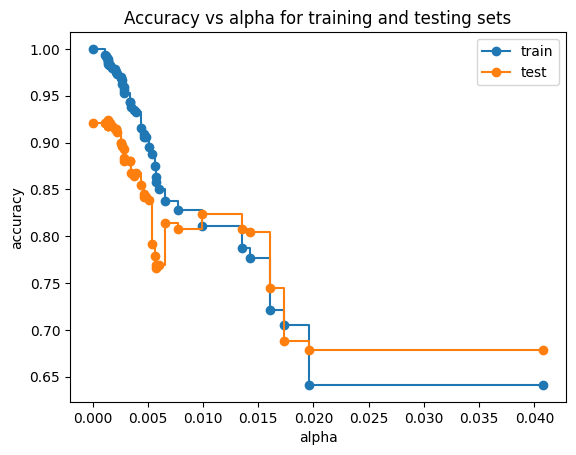

In [ ]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
treemodel_cost_complexity = DecisionTreeClassifier(random_state=0, ccp_alpha=0.00)
treemodel_cost_complexity.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

[Text(0.4848533163265306, 0.9583333333333334, 'x[4] <= 1.5\ngini = 0.46\nsamples = 641\nvalue = [230, 411]'),
 Text(0.19579081632653061, 0.875, 'x[4] <= 0.5\ngini = 0.5\nsamples = 338\nvalue = [167, 171]'),
 Text(0.08163265306122448, 0.7916666666666666, 'x[8] <= 1.5\ngini = 0.423\nsamples = 115\nvalue = [35, 80]'),
 Text(0.030612244897959183, 0.7083333333333334, 'x[0] <= 1.5\ngini = 0.493\nsamples = 61\nvalue = [27, 34]'),
 Text(0.02040816326530612, 0.625, 'gini = 0.0\nsamples = 15\nvalue = [15, 0]'),
 Text(0.04081632653061224, 0.625, 'x[8] <= 0.5\ngini = 0.386\nsamples = 46\nvalue = [12, 34]'),
 Text(0.030612244897959183, 0.5416666666666666, 'gini = 0.0\nsamples = 14\nvalue = [0, 14]'),
 Text(0.05102040816326531, 0.5416666666666666, 'x[6] <= 1.5\ngini = 0.469\nsamples = 32\nvalue = [12, 20]'),
 Text(0.02040816326530612, 0.4583333333333333, 'x[2] <= 1.5\ngini = 0.48\nsamples = 15\nvalue = [9, 6]'),
 Text(0.01020408163265306, 0.375, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(0.03

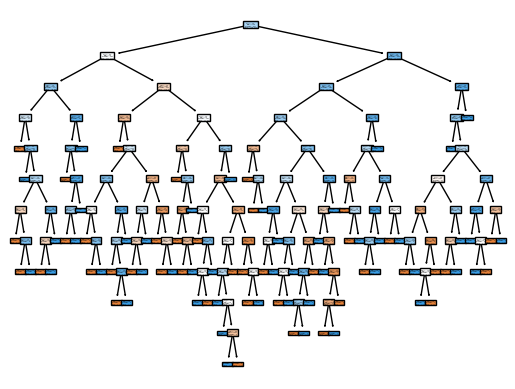

In [ ]:
tree.plot_tree(treemodel_cost_complexity,filled=True)

In [ ]:
y_pred_cost_complexity=treemodel_cost_complexity.predict(X_test)

In [ ]:
print(f'accuracy: {accuracy_score(y_pred_cost_complexity,y_test):.6f}')


accuracy: 0.921136


# Cost Complexity Decision Tree Report

In [ ]:
print(classification_report(y_pred_cost_complexity,y_test))

              precision    recall  f1-score   support

           0       0.86      0.89      0.88        99
           1       0.95      0.94      0.94       218

    accuracy                           0.92       317
   macro avg       0.91      0.91      0.91       317
weighted avg       0.92      0.92      0.92       317



In [ ]:
pip install chefboost

In [ ]:
from chefboost.training import Training

def findGain(threshold, d, column):
  idx = d[d[column] <= threshold].index
  tmp_d = d.copy()
  tmp_d[column] = '>' + str(threshold)
  tmp_d.loc[idx, column] = '<=' + str(threshold)
  config = {'algorithm': 'CART'}
  gain = Training.findGains(tmp_d, config)['gains'][column]
  return gain

In [ ]:
def change_to_class(columns, decision):
  binary_selection = {}
  for column in columns:
    df_temp = df_train.copy()
    df_temp = df_temp[[column, decision]]
    df_temp.rename(columns={decision : "Decision"}, inplace=True)
    uniques_values = sorted(df_temp[column].unique())
    theresold, mx_gain = 0, 1
    for i in uniques_values:
      gain = findGain(i, df_temp, column)
      if (mx_gain > gain):
        theresold = i
        mx_gain = gain
    binary_selection[column] = theresold
  return binary_selection
    # idx = classified_df[classified_df[column] <= mx_theresold].index
    # classified_df[column] = '>' + str(mx_theresold)
    # classified_df.loc[idx, column] = '<=' + str(mx_theresold)

In [ ]:
print(df_train)

     TL  TM  TR  ML  MM  MR  BL  BM  BR  class
181   2   1   1   0   2   1   0   2   2      1
274   2   0   1   0   1   1   2   2   2      1
921   0   1   1   2   2   1   2   2   1      0
69    2   2   2   0   0   1   2   1   1      1
291   2   0   0   1   2   0   0   1   2      1
..   ..  ..  ..  ..  ..  ..  ..  ..  ..    ...
106   2   2   0   1   2   1   1   0   2      1
270   2   0   1   0   2   1   1   2   2      1
860   1   0   2   1   2   0   1   0   2      0
435   1   0   2   1   2   1   2   0   2      1
102   2   2   0   2   1   1   2   0   1      1

[641 rows x 10 columns]


In [ ]:
numerical_features = []
print(numerical_features)
binary_selection = change_to_class(numerical_features, 'class')
print(binary_selection)

[]
{}


In [ ]:
class SelectRootDecisionTree():
  def __init__(self, criterion = "gini", max_depth = 20):
    self.criterion = criterion
    self.max_depth = max_depth

  def fit(self, X):
    self.X = X.copy();

  def predict(self, X_test):
    X_sub = {}
    DT_set = {}
    for feature in self.X.columns[0: -1]:
      X_sub[feature] = {}
      DT_set[feature] = {}
      if feature in numerical_features:
        X_sub[feature][0] = self.X[self.X[feature] < binary_selection[feature]].drop([feature], axis=1)
        X_sub[feature][1] = self.X[self.X[feature] >= binary_selection[feature]].drop([feature], axis=1)

        if 0 in list(X_sub[feature].keys()):
          if not X_sub[feature][0].empty:
            DT_set[feature][0] = DecisionTreeClassifier(max_depth = self.max_depth)
            Y_Sub = X_sub[feature][0].iloc[:,-1:]
            X_temp = X_sub[feature][0].iloc[:,:-1]
            DT_set[feature][0] = DT_set[feature][0].fit(X_temp, Y_Sub)
        if 1 in list(X_sub[feature].keys()):
          if not X_sub[feature][1].empty:
            DT_set[feature][1] = DecisionTreeClassifier(max_depth = self.max_depth)
            Y_Sub = X_sub[feature][1].iloc[:,-1:]
            X_temp = X_sub[feature][1].iloc[:,:-1]
            DT_set[feature][1] = DT_set[feature][1].fit(X_temp, Y_Sub)
      else:
        for label in np.unique(self.X[feature].values):
          X_sub[feature][label] = self.X[self.X[feature].eq(label)].drop([feature], axis=1)
          DT_set[feature][label] = DecisionTreeClassifier(max_depth = self.max_depth)
          Y_Sub = X_sub[feature][label].iloc[:,-1:]
          X_temp = X_sub[feature][label].iloc[:,:-1]
          DT_set[feature][label] = DT_set[feature][label].fit(X_temp, Y_Sub)

    predictions = []
    target = self.X.columns[-1:][0]
    # res = DT_set['Outlook'][1].predict(pd.DataFrame([row[1]],columns=X_test.columns).drop(['Outlook'], axis=1))

    for feature in X_test.columns:
      prediction = []
      for row in X_test.iterrows():
        label = row[1][feature]
        if feature in numerical_features:
          label = 1 if row[1][feature] >= binary_selection[feature] else 0
        if label not in list(X_sub[feature].keys()) or X_sub[feature][label].empty:
          prediction.append(0)
          continue;
        decisions = np.unique(X_sub[feature][label][target].values);
        if (len(decisions) == 1):
          prediction.append(decisions[0]);
          continue
        test_data = pd.DataFrame([row[1]],columns=X_test.columns).drop([feature], axis=1)
        res = DT_set[feature][label].predict(test_data)
        prediction.append(res[0])
      predictions.append(prediction)
    return predictions;
        # prediction.append()



In [ ]:
proposed_algo_1_dt = SelectRootDecisionTree(max_depth = 9)
proposed_algo_1_dt.fit(df_train)
print(X_test)
y_pred_proposed_algo_1 = proposed_algo_1_dt.predict(X_test)
print(y_pred_proposed_algo_1)

     TL  TM  TR  ML  MM  MR  BL  BM  BR
836   1   1   1   0   2   2   2   1   2
477   1   0   0   2   2   2   0   0   1
350   1   2   0   2   2   0   1   2   1
891   0   2   1   2   2   1   2   1   1
855   1   0   2   2   1   0   0   2   1
..   ..  ..  ..  ..  ..  ..  ..  ..  ..
746   1   2   2   2   1   0   1   2   1
824   1   1   1   2   0   2   2   1   2
863   1   0   2   1   0   0   1   2   2
90    2   2   1   1   2   1   0   2   0
898   0   2   1   2   1   0   1   2   0

[317 rows x 9 columns]
[[0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,

In [ ]:
from sklearn.metrics import recall_score
mx_recal, proposed_algo_result = 0, []
for feature_pred in y_pred_proposed_algo_1:
  # print(y_test_proposed_algo_1)
  recall = recall_score(feature_pred, y_test, average='macro')
  if (recall > mx_recal):
    proposed_algo_result = feature_pred
    mx_recal = recall
print(mx_recal)

0.9069353327085286


In [ ]:
print(f'accuracy: {accuracy_score(proposed_algo_result, y_test):.6f}')

accuracy: 0.914826


In [ ]:
print(classification_report(proposed_algo_result, y_test))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86        97
           1       0.95      0.93      0.94       220

    accuracy                           0.91       317
   macro avg       0.90      0.91      0.90       317
weighted avg       0.92      0.91      0.92       317

